<a href="https://colab.research.google.com/github/manmeet3/Deep_Learning/blob/master/homework_2_graded/keras_boolean_crossentropy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score

from keras.models import Sequential
from keras.layers import Dense

np.random.seed(0)

# Read Standard Wine Datasets

In [3]:
# Reading wine dataset
white_wine = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')
red_wine = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

In [4]:
print(white_wine.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None


In [5]:
print(red_wine.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [6]:
white_wine.tail(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


# EDA

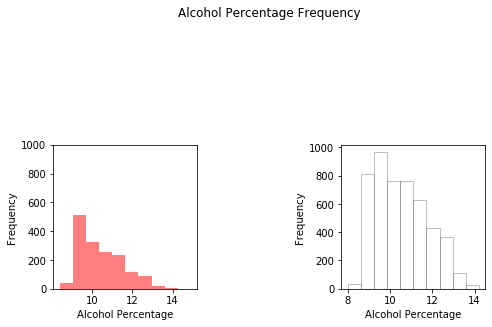

In [7]:
fig, ax = plt.subplots(1, 2)

ax[0].hist(red_wine.alcohol, 10, facecolor='red', alpha=0.5, label="Red wine")
ax[1].hist(white_wine.alcohol, 10, facecolor='white', ec="black", lw=0.5, alpha=0.5, label="White wine")

fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=1)
ax[0].set_ylim([0, 1000])
ax[0].set_xlabel("Alcohol Percentage")
ax[0].set_ylabel("Frequency")
ax[1].set_xlabel("Alcohol Percentage")
ax[1].set_ylabel("Frequency")

fig.suptitle("Alcohol Percentage Frequency")

plt.show()

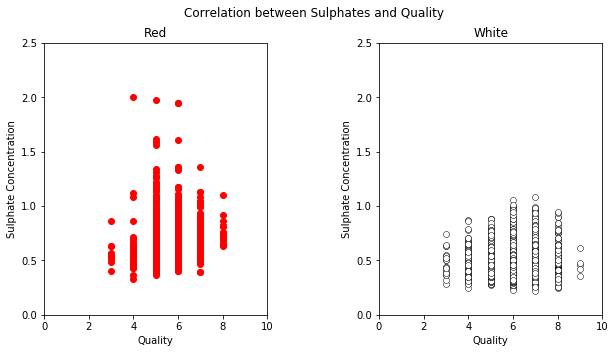

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].scatter(red_wine['quality'], red_wine["sulphates"], color="red")
ax[1].scatter(white_wine['quality'], white_wine['sulphates'], color="white", edgecolors="black", lw=0.5)

ax[0].set_title("Red")
ax[1].set_title("White")
ax[0].set_xlabel("Quality")
ax[1].set_xlabel("Quality")
ax[0].set_ylabel("Sulphate Concentration")
ax[1].set_ylabel("Sulphate Concentration")
ax[0].set_xlim([0,10])
ax[1].set_xlim([0,10])
ax[0].set_ylim([0,2.5])
ax[1].set_ylim([0,2.5])
fig.subplots_adjust(wspace=0.5)
fig.suptitle("Correlation between Sulphates and Quality")

plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

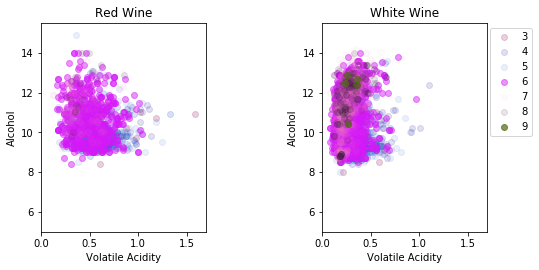

In [14]:
redlabels = np.unique(red_wine['quality'])
whitelabels = np.unique(white_wine['quality'])

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
redcolors = np.random.rand(6,4)
whitecolors = np.append(redcolors, np.random.rand(1,4), axis=0)

for i in range(len(redcolors)):
    red_y = red_wine['alcohol'][red_wine.quality == redlabels[i]]
    red_x = red_wine['volatile acidity'][red_wine.quality == redlabels[i]]
    ax[0].scatter(red_x, red_y, c=redcolors[i])
    
for i in range(len(whitecolors)):
    white_y = white_wine['alcohol'][white_wine.quality == whitelabels[i]]
    white_x = white_wine['volatile acidity'][white_wine.quality == whitelabels[i]]
    ax[1].scatter(white_x, white_y, c=whitecolors[i])
    
ax[0].set_title("Red Wine")
ax[1].set_title("White Wine")
ax[0].set_xlim([0,1.7])
ax[1].set_xlim([0,1.7])
ax[0].set_ylim([5,15.5])
ax[1].set_ylim([5,15.5])
ax[0].set_xlabel("Volatile Acidity")
ax[0].set_ylabel("Alcohol")
ax[1].set_xlabel("Volatile Acidity")
ax[1].set_ylabel("Alcohol") 

ax[1].legend(whitelabels, loc='best', bbox_to_anchor=(1.3, 1))

fig.subplots_adjust(top=0.85, wspace=0.7)

plt.show()

In [16]:
# Set up Y Targets for wine type
red_wine['type'] = 1
white_wine['type'] = 0

In [17]:
wines = red_wine.append(white_wine, ignore_index=True)

## Correlation matrix

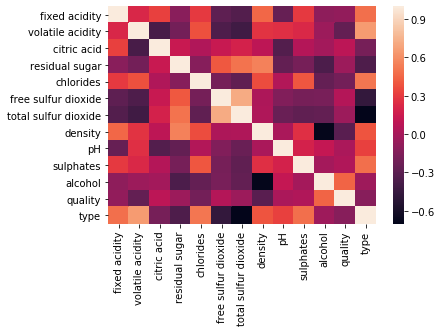

In [18]:
import seaborn as sns
corr = wines.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [19]:
# Convert to categorical after splitting X and Y
X=wines.iloc[:,0:11]

y=np.ravel(wines.type)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [20]:
# Scale the dataset 
scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Keras Model

In [21]:
model = Sequential()
model.add(Dense(12, activation='relu', input_shape=(11,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [22]:
model.output_shape

(None, 1)

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                144       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
                   
model.fit(X_train, y_train,epochs=20, batch_size=1, verbose=1)

Epoch 1/20
4352/4352 [==============================] - 14s 3ms/step - loss: 0.0727 - accuracy: 0.9830
Epoch 2/20
4352/4352 [==============================] - 13s 3ms/step - loss: 0.0235 - accuracy: 0.9947
Epoch 3/20
4352/4352 [==============================] - 13s 3ms/step - loss: 0.0204 - accuracy: 0.9959
Epoch 4/20
4352/4352 [==============================] - 13s 3ms/step - loss: 0.0164 - accuracy: 0.9970
Epoch 5/20
4352/4352 [==============================] - 12s 3ms/step - loss: 0.0159 - accuracy: 0.9968
Epoch 6/20
4352/4352 [==============================] - 13s 3ms/step - loss: 0.0137 - accuracy: 0.9975
Epoch 7/20
4352/4352 [==============================] - 13s 3ms/step - loss: 0.0138 - accuracy: 0.9968
Epoch 8/20
4352/4352 [==============================] - 14s 3ms/step - loss: 0.0122 - accuracy: 0.9975
Epoch 9/20
4352/4352 [==============================] - 13s 3ms/step - loss: 0.0120 - accuracy: 0.9972
Epoch 10/20
4352/4352 [==============================] - 13s 3ms/step - l

# Test Dataset

In [0]:
y_pred = model.predict(X_test)

In [24]:
score = model.evaluate(X_test, y_test,verbose=1)
print(score)

2145/2145 [==============================] - 0s 26us/step
[0.027185488787226923, 0.9953380227088928]


In [0]:
y_pred[y_pred <= 0.5] = 0.
y_pred[y_pred > 0.5] = 1.

In [32]:
confusion_matrix(y_test, y_pred)

array([[1587,    1],
       [   9,  548]])

In [33]:
precision_score(y_test, y_pred)

0.9981785063752276

In [34]:
recall_score(y_test, y_pred)

0.9838420107719928

In [35]:
f1_score(y_test,y_pred)

0.9909584086799277